In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


## Create graph

In [2]:
# create random graph
g = nx.erdos_renyi_graph(n=10, p=0.5, seed=42)

In [3]:
# add node properties such as weight and opinion
for node in g.nodes:
    g.nodes[node]['opinion'] = np.random.rand()
    g.nodes[node]['conformity'] = np.random.rand()
    g.nodes[node]['weight'] = np.random.rand()

# display thier properties
for node in g.nodes:
    print(g.nodes[node])

{'opinion': 0.246207609615532, 'conformity': 0.30796518035036624, 'weight': 0.864851469685662}
{'opinion': 0.2094026226698391, 'conformity': 0.7855205578538427, 'weight': 0.22438466612750851}
{'opinion': 0.6598220190869761, 'conformity': 0.19470754067468998, 'weight': 0.5893393870875305}
{'opinion': 0.2745959569911829, 'conformity': 0.09358133569248028, 'weight': 0.7762606220415837}
{'opinion': 0.32371179667414773, 'conformity': 0.8040997987525559, 'weight': 0.12391502577652103}
{'opinion': 0.00988543747359616, 'conformity': 0.9535808416737377, 'weight': 0.9544777684482756}
{'opinion': 0.3103631861160313, 'conformity': 0.7791739445777877, 'weight': 0.046344094626244}
{'opinion': 0.2581916872369894, 'conformity': 0.001934269538333977, 'weight': 0.2784076277262135}
{'opinion': 0.045838102964909644, 'conformity': 0.0178209601545688, 'weight': 0.7199908573678914}
{'opinion': 0.7103069114109175, 'conformity': 0.49746342385261777, 'weight': 0.9514849893177764}


## plot network

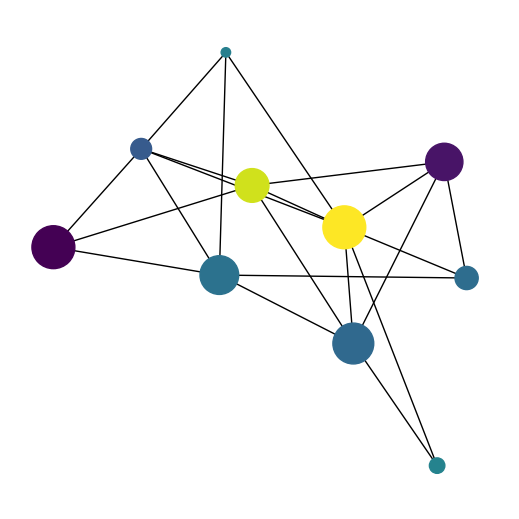

In [4]:
# plot network with weights as node size and opinions as node color
plt.figure(figsize=(5, 5))
nx.draw(g, node_size=[g.nodes[node]['weight']*1000 for node in g.nodes],
        node_color=[g.nodes[node]['opinion'] for node in g.nodes])
plt.show()

# Simulate

The following simulates

\begin{equation}
Y_i(t + 1) = \alpha_i Y_i(t) + (1 - \alpha_i) \frac{\sum_{j \in N} Y_j(t)}{d_i}
\end{equation}

In [5]:
# simulate
result_opinions = []

for _ in range(0, 100):
    # create adjacency matrix
    adj_matrix = nx.adjacency_matrix(g).todense()

    # degree
    degrees = adj_matrix.sum(axis=1).reshape((-1, 1))

    # opinion
    opinions = np.array(nx.attr_matrix(g, node_attr='opinion')[1]).reshape((-1, 1))

    # conformity
    conformity = np.array(nx.attr_matrix(g, node_attr='conformity')[1]).reshape((-1, 1))

    # weight
    weight = np.array(nx.attr_matrix(g, node_attr='weight')[1]).reshape((-1, 1))

    # model / update opinion 
    new_opinions = conformity * opinions + (1 - conformity) * (adj_matrix * weight @ opinions) / degrees

    # save
    result_opinions.append(new_opinions)

    # update
    for node in g.nodes:
        g.nodes[node]['opinion'] = new_opinions[node][0]

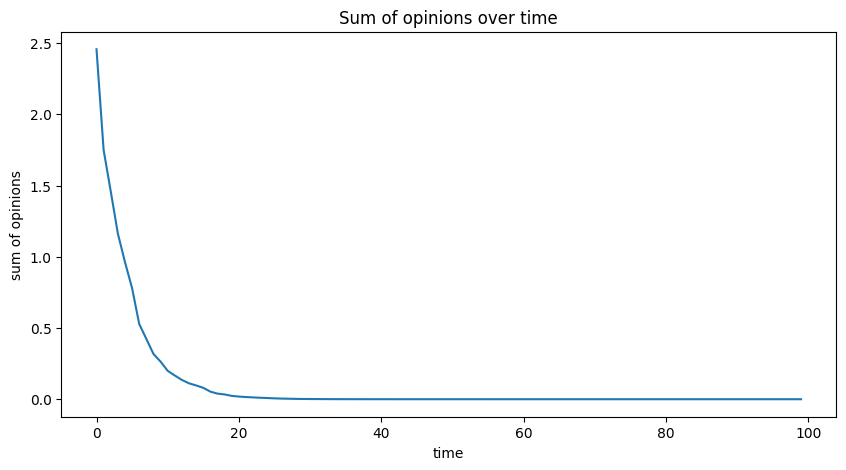

In [6]:
# plot each time of sum of opinions
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(np.array(result_opinions).sum(axis=1))
ax.set_xlabel('time')
ax.set_ylabel('sum of opinions')
ax.set_title('Sum of opinions over time')
plt.show()
